In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
import missingno as msno
from sklearn.utils import shuffle 
# from category_encoders import TargetEncoder, OneHotEncoder
import warnings
import re

In [4]:
df = pd.read_csv("C://Users/60102/Desktop/NLP/cyberbullying_tweets.csv", encoding="iso-8859-1", low_memory=False)
pd.set_option('display.max_colwidth', 100)

ImportError: Missing optional dependency 'fsspec'.  Use pip or conda to install fsspec.

In [ ]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours ...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on t...",not_cyberbullying
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is al...",not_cyberbullying


# 1.0 Data Pre-processing

In [ ]:
df['cyberbullying_type'].replace(['not_cyberbullying', 'gender', 'religion', 'age', 'ethnicity', 'other_cyberbullying'],
                        [0, 1, 2, 3, 4, 5], inplace=True)

In [ ]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was crapilicious! #mkr",0
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours ...,0
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,0
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on t...",0
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is al...",0


## 1.1 Check for Null Values

In [ ]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

## 1.2 Plot a graph to see the count of tweet for each cyberbullying_type

<AxesSubplot:>

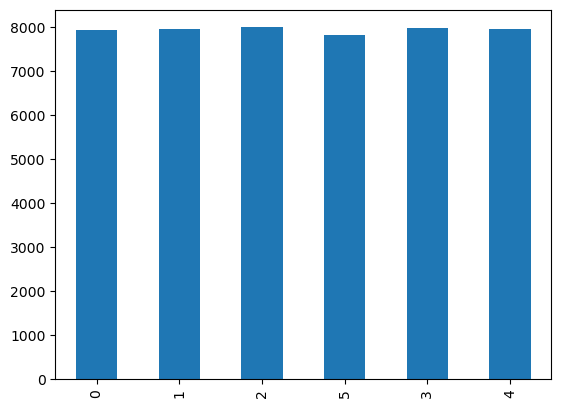

In [ ]:
df.cyberbullying_type.value_counts()[df.cyberbullying_type.unique()].plot(kind='bar')

## 1.3 Check for duplicate values

In [ ]:
df['tweet_text'].duplicated().sum()

1675

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 745.3+ KB


In [ ]:
df.drop_duplicates("tweet_text", inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46017 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          46017 non-null  object
 1   cyberbullying_type  46017 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


## 1.4 Removing Special Characters and Numbers

In [10]:
def remove_special_characters(txt):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', txt)
    return text

def remove_numbers(txt):
    # Using regex to substitute all numeric characters with an empty string
    text = re.sub(r'\d', '', txt)
    return text

## 1.5 Remove Emojis

In [12]:
import demoji
def remove_emojis(txt):
    return demoji.replace(txt, '')

## 1.6 Remove tweets that are not in English

In [13]:
from langdetect import detect, LangDetectException
def remove_nonEnglish_text(txt):
    try:
        lang = detect(txt)
    except LangDetectException:
        lang = "unknown"
    return txt if lang == "en" else ""

## 1.7 Remove words that are shorter than 3 letters

In [14]:
def remove_short_words(txt, min_len=3):
    words = txt.split()
    long_words = [word for word in words if len(word) >= min_len]
    return ' '.join(long_words)

## 1.8 Remove tweets that are only 2 words or less

In [15]:
def remove_short_tweets(txt, min_words=4):
    words = txt.split()
    return txt if len(words) >= min_words else ""

## 1.9 Remove tweets that are more than 100 words

In [16]:
def remove_long_tweets(txt, max_words=100):
    words = txt.split()
    return txt if len(words) < max_words else ""

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46017 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          46017 non-null  object
 1   cyberbullying_type  46017 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


## 1.10 Remove URL

In [17]:
def remove_url(txt):
    return re.sub(r'(?:http[s]?://)?(?:www\.)?(?:bit\.ly|goo\.gl|t\.co|tinyurl\.com|tr\.im|is\.gd|cli\.gs|u\.nu|url\.ie|tiny\.cc|alturl\.com|ow\.ly|bit\.do|adoro\.to)\S+', '', txt)

## 1.11 Remove punctuation

In [18]:
import string
string.punctuation

def remove_punct(txt): 
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct

## 1.12 Tokenization

In [19]:
import re

def tokenize(txt): 
    tokens = re.split('\W+', txt)
    return tokens 

## 1.13 Stopwords Removal

In [20]:
import nltk
from nltk.corpus import stopwords
",".join(stopwords.words('english'))
stopwords = nltk.corpus.stopwords.words('english')

In [21]:
#function to remove stopwords
def remove_stopwords(x): 
    return " ".join([word for word in str(x).split() if word not in stopwords])

## 1.14 Lemmatization

In [22]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatization(txt):
    lemmatized_words = [lemmatizer.lemmatize(word) for word in txt]
    return ' '.join(lemmatized_words)

## 1.15 Putting all pre-processing functions into one function

In [23]:
def finalClean_text(txt):
    txt = remove_special_characters(txt)
    txt = remove_numbers(txt)
    txt = remove_emojis(txt)
    txt = remove_nonEnglish_text(txt)
    txt = remove_short_words(txt)
    txt = remove_short_tweets(txt)
    txt = remove_long_tweets(txt)
    txt = remove_url(txt)
    txt = remove_punct(txt)
    txt = remove_stopwords(txt)
    txt = tokenize(txt)
    txt = lemmatization(txt)
    txt = ' '.join(txt.split())
    return txt

In [ ]:
# df['tweet_text'] = [finalClean_text(txt) for txt in df['tweet_text']]
df['tweet_text'] = df['tweet_text'].apply(lambda x: finalClean_text(x))

In [ ]:
df.head(50)

,tweet_text,cyberbullying_type,t_textFinal
0,word katandandre food crapilicious mkr,0,word katandandre food crapilicious mkr
1,Why aussietv white MKR theblock ImACelebrityAU today sunrise studio Neighbours WonderlandTen etc,0,Why aussietv white MKR theblock ImACelebrityAU today sunrise studio Neighbours WonderlandTen etc
2,XochitlSuckkks classy whore red velvet cupcake,0,XochitlSuckkks classy whore red velvet cupcake
3,JasonGio meh thanks head concerned another angry dude twitter,0,JasonGio meh thanks head concerned another angry dude twitter
4,RudhoeEnglish This ISIS account pretending Kurdish account Like Islam lie,0,RudhoeEnglish This ISIS account pretending Kurdish account Like Islam lie
5,Rajaaab Quickieleaks Yes test god good bad indifferent weird whatever prof god existence,0,Rajaaab Quickieleaks Yes test god good bad indifferent weird whatever prof god existence
6,,0,
7,Karma hope bite Kat butt She nasty mkr,0,Karma hope bite Kat butt She nasty mkr
8,stockputout everything mostly priest,0,stockputout everything mostly priest
9,Rebecca Black Drops Out School Due Bullying,0,Rebecca Black Drops Out School Due Bullying


## 1.16 Check for Duplicates (After Cleaning) 

In [ ]:
df['tweet_text'].duplicated().sum()

3676

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46017 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          46017 non-null  object
 1   cyberbullying_type  46017 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
df.drop_duplicates("tweet_text", inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42341 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          42341 non-null  object
 1   cyberbullying_type  42341 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 992.4+ KB


In [ ]:
df.head(50)

,tweet_text,cyberbullying_type
0,word katandandre food crapilicious mkr,0
1,Why aussietv white MKR theblock ImACelebrityAU today sunrise studio Neighbours WonderlandTen etc,0
2,XochitlSuckkks classy whore red velvet cupcake,0
3,JasonGio meh thanks head concerned another angry dude twitter,0
4,RudhoeEnglish This ISIS account pretending Kurdish account Like Islam lie,0
5,Rajaaab Quickieleaks Yes test god good bad indifferent weird whatever prof god existence,0
6,,0
7,Karma hope bite Kat butt She nasty mkr,0
8,stockputout everything mostly priest,0
9,Rebecca Black Drops Out School Due Bullying,0


## 1.17 Check for Imbalance (After Cleaning) 

<AxesSubplot:>

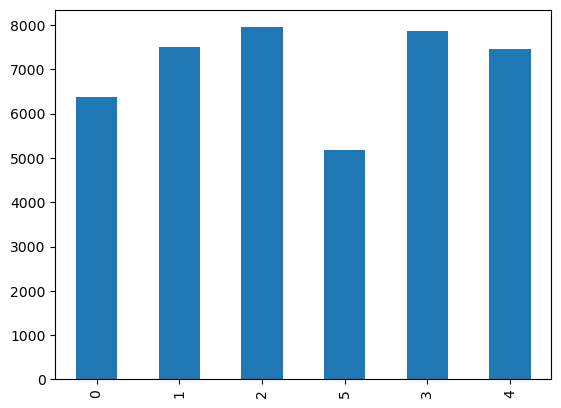

In [ ]:
df.cyberbullying_type.value_counts()[df.cyberbullying_type.unique()].plot(kind='bar')

## 1.18 Word Cloud

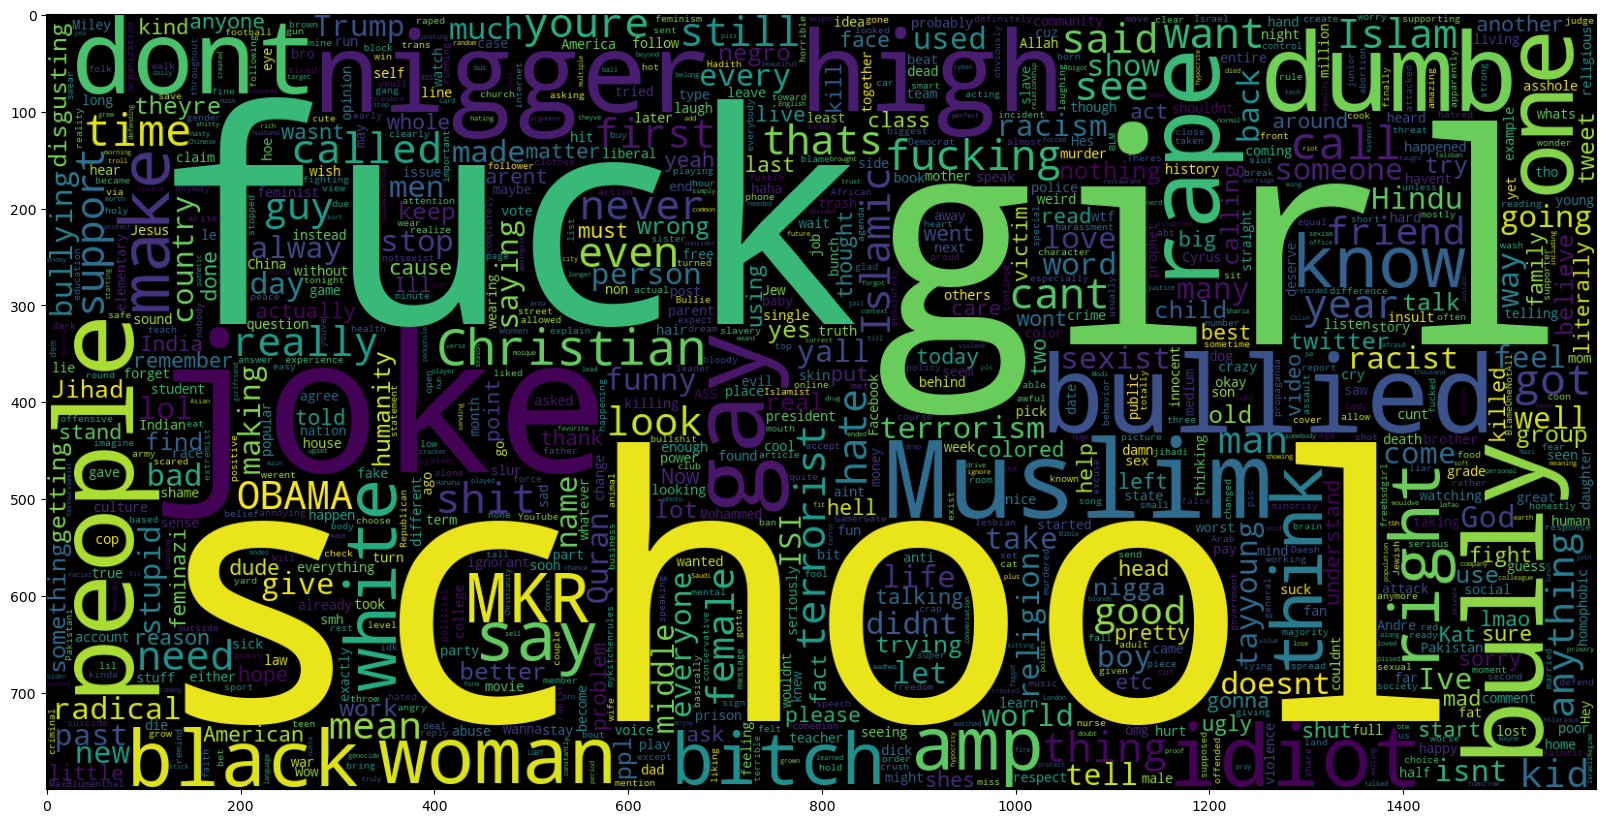

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize= (20,20))
wc = WordCloud(max_words=1000, width= 1600, height= 800, 
                collocations= False).generate(' '.join(df['tweet_text']))
plt.imshow(wc)

## 1.19 Splitting Train Test

In [ ]:
df['t_textFinal'] = df['tweet_text']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

t_text = df['t_textFinal']
c_type = df['cyberbullying_type']

X_train, X_test, y_train, y_test = train_test_split(t_text, c_type, test_size=0.2, random_state=42)

## 1.20 TFIDF

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform the training data into a TF-IDF representation
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data into a TF-IDF representation
X_test_tfidf = vectorizer.transform(X_test)

NameError: name 'X_train' is not defined

## 1.21 SMOTE (Oversampling) 

In [ ]:
from imblearn.over_sampling import SMOTE
vc = y_train.value_counts()
while (vc[0] != vc[4]) or (vc[0] !=  vc[2]) or (vc[0] !=  vc[3]) or (vc[0] !=  vc[1]):
    smote = SMOTE(sampling_strategy='minority')
    X_train_tfidf, y_train = smote.fit_resample(X_train_tfidf, y_train)
    vc = y_train.value_counts()

y_train.value_counts()

2    6408
0    6408
1    6408
3    6408
5    6408
4    6408
Name: cyberbullying_type, dtype: int64

# 2.0 Modelling

## 2.1 Logistic Regression

### 2.1.1 Train Dataset Results

In [ ]:
# # Initialize and train a classifier (e.g., Logistic Regression) using the TF-IDF representation
# logReg = LogisticRegression(max_iter=1000)
# logReg.fit(X_train_tfidf, y_train)

# # Evaluate the performance of the classifier
# accuracy = logReg.score(X_train_tfidf, y_train)
# print("Accuracy:", accuracy)

### 2.1.2 Test Data Results

In [ ]:
# # Predict on the test data
# y_pred = logReg.predict(X_test_tfidf)

# # Evaluate the performance of the classifier
# accuracy = logReg.score(X_test_tfidf, y_test)
# print("Accuracy:", accuracy)

## 2.2 SVM

### Train Data Results

In [ ]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel= 'linear', C = 1, probability = True)
svm_model_linear.fit(X_train_tfidf, y_train)
accuracy = svm_model_linear.score(X_train_tfidf, y_train)
print("Accuracy:", accuracy)

Accuracy: 0.9637172284644194


### Test Data Results

In [ ]:
# svm_predictions  = svm_model_linear.predict(X_test_tfidf)
accuracy = svm_model_linear.score(X_test_tfidf, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8579525327665604


## 2.3 Random Forest Classifier

### 2.3.1 Train Data Results

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators = 30)
# rf.fit(X_train_tfidf, y_train)

# accuracy = rf.score(X_train_tfidf, y_train)
# print("Training Accuracy:", accuracy)

### 2.3.2 Test Data Results

In [ ]:
# accuracy = rf.score(X_test_tfidf, y_test)
# print("Test Accuracy:", accuracy)


## 2.4 Naive Bayes

In [ ]:
# from sklearn.naive_bayes import MultinomialNB
# nb = MultinomialNB()
# nb.fit(X_train_tfidf, y_train)
# accuracy = nb.score(X_train_tfidf, y_train)
# print("Training Accuracy:", accuracy)

In [ ]:
# accuracy = nb.score(X_test_tfidf, y_test)
# print("Training Accuracy:", accuracy)

# 3.0 Cross Validation Results

In [ ]:
from sklearn.model_selection import cross_val_score
# SVM_cvScore = cross_val_score(svm_model_linear, X_train_tfidf, y_train, cv=5)
SVM_cvScore = cross_val_score(svm_model_linear, X_train_tfidf, y_train, cv=5)

In [ ]:
print(SVM_cvScore.mean())

0.8842604392710711


# 4.0 Deployment

## 4.1 Model Testing 

In [ ]:
# text = "i hate niggers"
# text_f = finalClean_text(text)
# text_f = vectorizer.transform([text])

# prediction = svm_model_linear.predict(text_f)
# prob = svm_model_linear.predict_proba(text_f)

# prob_nonBully = round((prob[0][0])*100)
# prob_gender = round((prob[0][1])*100)
# prob_religion = round((prob[0][2])*100)
# prob_age = round((prob[0][3])*100)
# prob_ethnicity = round((prob[0][4])*100)
# prob_otherBully = round((prob[0][5])*100)

# if prediction[0] == 0 : 
#     print("This is most likely not cyberbullying with", prob_nonBully, "%")

# elif prediction[0] == 1:
#     print("This is most likely gender bullying with", prob_gender, "%")
    
# elif prediction[0] == 2: 
#     print("This is most likely religion bullying with", prob_religion, "%")
    
# elif prediction[0] == 3: 
#     print("This is most likely age bullying with", prob_age, "%")
    
# elif prediction[0] == 4: 
#     print("This is most likely ethinicity bullying with", prob_ethnicity, "%")
    
# elif prediction[0] == 5: 
#     print("This is most likely other cyberbullying with", prob_otherBully, "%")


## 4.2 Model Deployment Website

In [ ]:
import joblib

In [ ]:
filename = 'cyberbullying_SVM_model.sav'
joblib.dump(svm_model_linear, filename)

NameError: name 'svm_model_linear' is not defined

In [28]:
tfidf_train_model = vectorizer.fit(X_train)
filename_tfidf = 'tfidf_fit.sav'
joblib.dump(tfidf_train_model, filename_tfidf)

NameError: name 'X_train' is not defined

In [30]:
# loading the saved model
loaded_model = joblib.load(open('/Users/nichdylan/Documents/Natural Language Processing/Hezron/cyberbullying_SVM_model.sav', 'rb')) #rb means read as binary
vectorizer = joblib.load(open('/Users/nichdylan/Documents/Natural Language Processing/Hezron/tfidf_fit.sav', 'rb'))

/Users/nichdylan/Documents/Natural Language Processing/nlp/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.3.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/nichdylan/Documents/Natural Language Processing/nlp/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.3.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/nichdylan/Documents/Natural Language Processing/nlp/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersio

In [35]:
text = "i am a faggot"
text_f = finalClean_text(text)
text_f = vectorizer.transform([text])

prediction = loaded_model.predict(text_f)
prob = loaded_model.predict_proba(text_f)

prob_nonBully = round((prob[0][0])*100)
prob_gender = round((prob[0][1])*100)
prob_religion = round((prob[0][2])*100)
prob_age = round((prob[0][3])*100)
prob_ethnicity = round((prob[0][4])*100)
prob_otherBully = round((prob[0][5])*100)

if prediction[0] == 0 : 
    print("This is most likely not cyberbullying with", prob_nonBully, "%")

elif prediction[0] == 1:
    print("This is most likely gender bullying with", prob_gender, "%")
    
elif prediction[0] == 2: 
    print("This is most likely religion bullying with", prob_religion, "%")
    
elif prediction[0] == 3: 
    print("This is most likely age bullying with", prob_age, "%")
    
elif prediction[0] == 4: 
    print("This is most likely ethinicity bullying with", prob_ethnicity, "%")
    
elif prediction[0] == 5: 
    print("This is most likely other cyberbullying with", prob_otherBully, "%")


This is most likely gender bullying with 85 %
